In [98]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score,StratifiedKFold
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn import metrics

%matplotlib inline

In [2]:
## Loading the data set
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Step 1 : Data Understanding

In [3]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
df_train.shape

(54808, 14)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
df_train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [7]:
percentage_of_null_entries = round(df_train.isnull().sum()/len(df_train.index),3)*100
percentage_of_null_entries

## education and previous_year_rating has missing data

employee_id             0.0
department              0.0
region                  0.0
education               4.4
gender                  0.0
recruitment_channel     0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    7.5
length_of_service       0.0
KPIs_met >80%           0.0
awards_won?             0.0
avg_training_score      0.0
is_promoted             0.0
dtype: float64

# Step 2: Data Cleaning & Modification

In [8]:
# Dropping the variable 'employee_id' as it is unique entity
df_train.drop(['employee_id'],axis=1,inplace=True)

In [9]:
## Checking the imbalanceness in data
df_train.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [10]:
## Only 8.5% of data belongs to class 1 in the category 'is_promoted'
df_train.is_promoted.value_counts()[1]/len(df_train.index)*100

8.517004816815064

#### Handling Missing Values in 'previous_year_rating' variable

In [11]:
pd.set_option('display.max_rows',None)
df_train['previous_year_rating'].replace('',np.nan)


0        5.0
1        5.0
2        3.0
3        1.0
4        3.0
5        3.0
6        3.0
7        3.0
8        4.0
9        5.0
10       NaN
11       5.0
12       5.0
13       3.0
14       3.0
15       1.0
16       3.0
17       1.0
18       5.0
19       3.0
20       3.0
21       4.0
22       3.0
23       NaN
24       5.0
25       5.0
26       5.0
27       4.0
28       5.0
29       NaN
30       5.0
31       1.0
32       1.0
33       4.0
34       5.0
35       2.0
36       4.0
37       5.0
38       5.0
39       5.0
40       3.0
41       4.0
42       4.0
43       2.0
44       5.0
45       5.0
46       4.0
47       3.0
48       3.0
49       3.0
50       4.0
51       3.0
52       3.0
53       1.0
54       3.0
55       2.0
56       NaN
57       3.0
58       NaN
59       4.0
60       4.0
61       3.0
62       NaN
63       4.0
64       5.0
65       3.0
66       NaN
67       NaN
68       4.0
69       3.0
70       5.0
71       5.0
72       1.0
73       4.0
74       3.0
75       4.0
76       1.0

In [12]:
df1 = df_train[df_train['previous_year_rating'].isnull()]

In [13]:
df1.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
23,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
29,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
56,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0
58,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0


In [14]:
df1['length_of_service'].value_counts()

1    4124
Name: length_of_service, dtype: int64

In [15]:
## Imputing Null values in Previous Year rating with 0 as all the employees have only 1 year length of service
df_train['previous_year_rating'].replace(np.nan,0,inplace=True)

In [16]:
df_train['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
0.0     4124
Name: previous_year_rating, dtype: int64

#### Handling Missing Values in 'education' variable

In [17]:
df_train.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [18]:
df2 = df_train[df_train['education'].isnull()]

In [19]:
df2.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,Technology,region_23,NaN,m,sourcing,1,30,0.0,1,0,0,77,0
21,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,0,57,0
32,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,0,48,0
43,Sales & Marketing,region_2,NaN,m,other,3,24,2.0,2,0,0,48,0
82,Sales & Marketing,region_2,NaN,m,sourcing,2,25,3.0,2,0,0,53,0


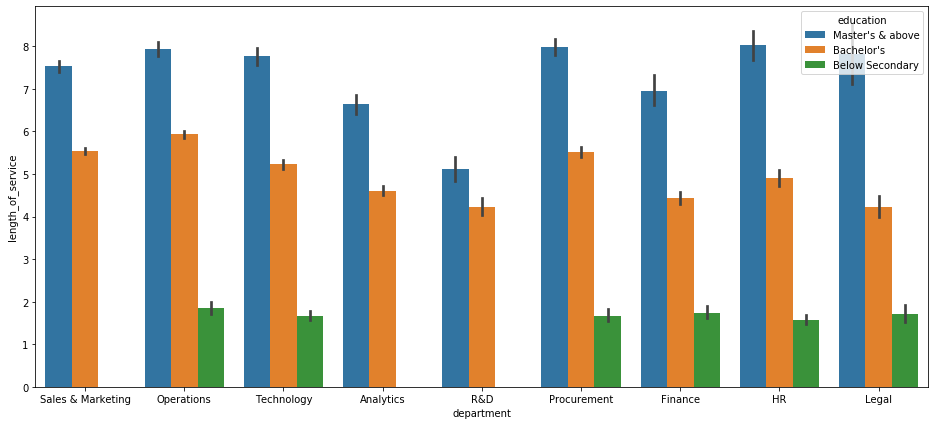

In [20]:
plt.figure(figsize=(16,7))
sns.barplot(x='department',y='length_of_service',hue='education',data=df_train)

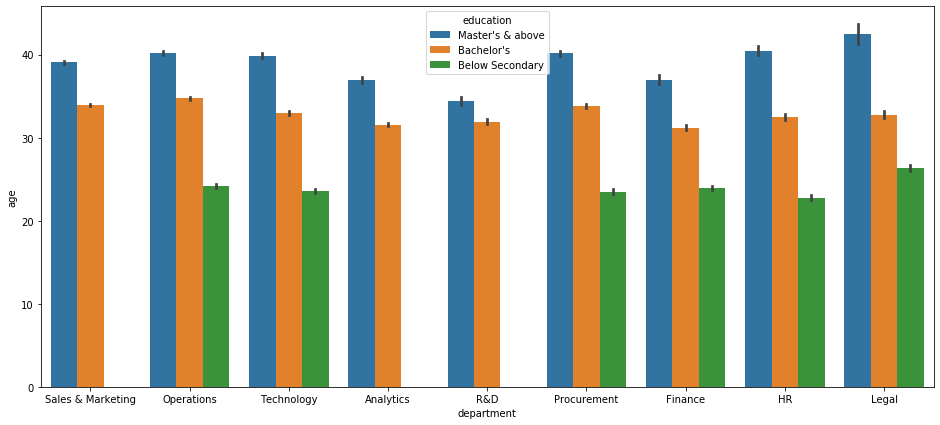

In [21]:
plt.figure(figsize=(16,7))
sns.barplot(x='department',y='age',hue='education',data=df_train)

In [22]:
df_train['age_at_joining'] = df_train['age']-df_train['length_of_service']

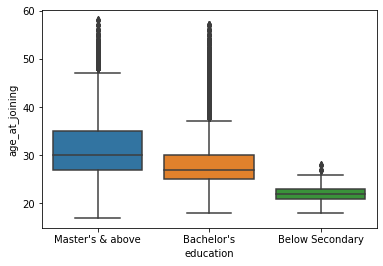

In [23]:
sns.boxplot(x='education',y='age_at_joining',data=df_train)

In [24]:
df21 = df_train[df_train['education']=="Below Secondary"]
print(df21['age_at_joining'].max())
print(df21['age_at_joining'].min())
print(df21['age_at_joining'].mean())
print(df21['age_at_joining'].median())

28
18
22.13167701863354
22.0


In [25]:
df22 = df_train[df_train['education']=="Bachelor's"]
print(df22['age_at_joining'].max())
print(df22['age_at_joining'].min())
print(df22['age_at_joining'].mean())
print(df22['age_at_joining'].median())

57
18
28.100684501895334
27.0


In [26]:
df23 = df_train[df_train['education']=="Master's & above"]
print(df23['age_at_joining'].max())
print(df23['age_at_joining'].min())
print(df23['age_at_joining'].mean())
print(df23['age_at_joining'].median())

58
17
31.747336683417085
30.0


In [27]:
## Replacing nan values in education 
df_train.loc[(df_train['age_at_joining']>28)&(df_train['education'].isnull()),'education'] = "Master's & above"
df_train.loc[(df_train['age_at_joining']>22)&(df_train['age_at_joining']<=28)&(df_train['education'].isnull()),'education'] = "Bachelor's"
df_train.loc[(df_train['age_at_joining']<=22)&(df_train['department'].isin(['Sales & Marketing','Analytics','R&D']))&(df_train['education'].isnull()),'education'] = "Bachelor's"
df_train.loc[(df_train['age_at_joining']<=22)&(df_train['department'].isin(['Operations','Technology','Procurement','Finance','HR','Legal']))&(df_train['education'].isnull()),'education'] = "Below Secondary"

In [28]:
percentage_of_null_entries2 = round(df_train.isnull().sum()/len(df_train.index),3)*100
percentage_of_null_entries2

department              0.0
region                  0.0
education               0.0
gender                  0.0
recruitment_channel     0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    0.0
length_of_service       0.0
KPIs_met >80%           0.0
awards_won?             0.0
avg_training_score      0.0
is_promoted             0.0
age_at_joining          0.0
dtype: float64

In [29]:
### dropping 'age_at_joining' columns which we created for education imputing
df_train.drop(['age_at_joining'],axis=1,inplace=True)

In [30]:
df_train.shape

(54808, 13)

# Step 3 : EDA

In [31]:
categorical_var = ['department','education','region','gender','recruitment_channel','no_of_trainings','previous_year_rating','KPIs_met >80%','awards_won?']
cont_var = ['age','length_of_service','avg_training_score']

#### Looking at the Correlations

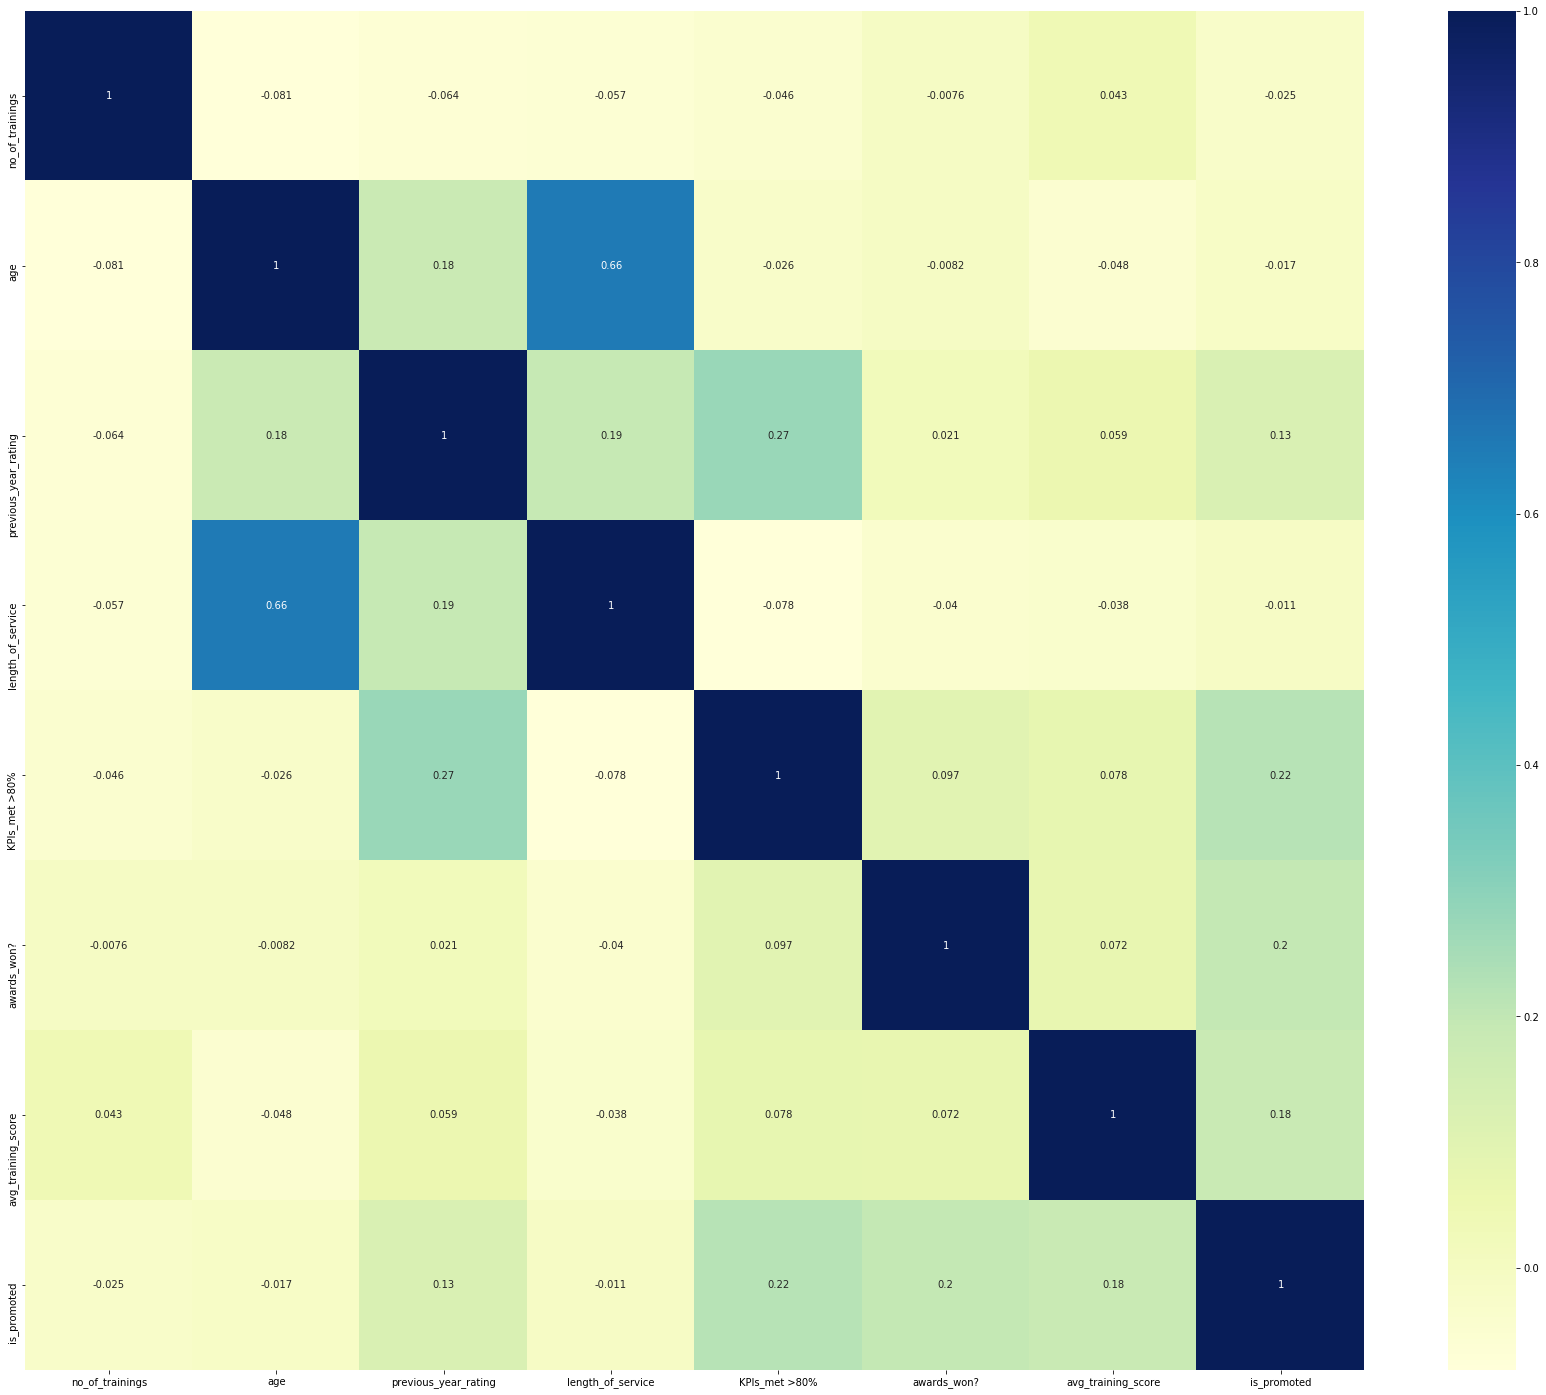

In [32]:
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### 1) Univariate Analysis

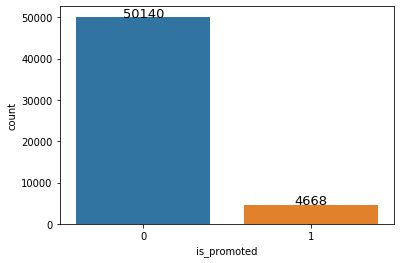

In [33]:
## plotting countplot for Target variable
g = sns.countplot(df_train.is_promoted)
for p in g.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    g.text(x+width/2, y+height, '{}'.format(height), horizontalalignment='center',fontsize=13)

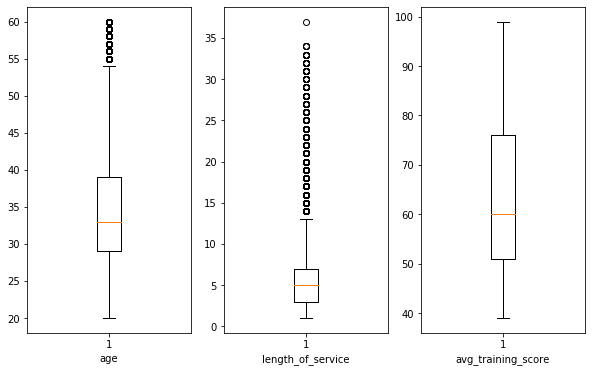

In [34]:
## Plotting boxplots for continuous variables
plt.figure(figsize=(10,6))
for i in range(1,len(cont_var)+1):
    plt.subplot(1,3,i)
    plt.boxplot(df_train[cont_var[i-1]])
    plt.xlabel(cont_var[i-1])

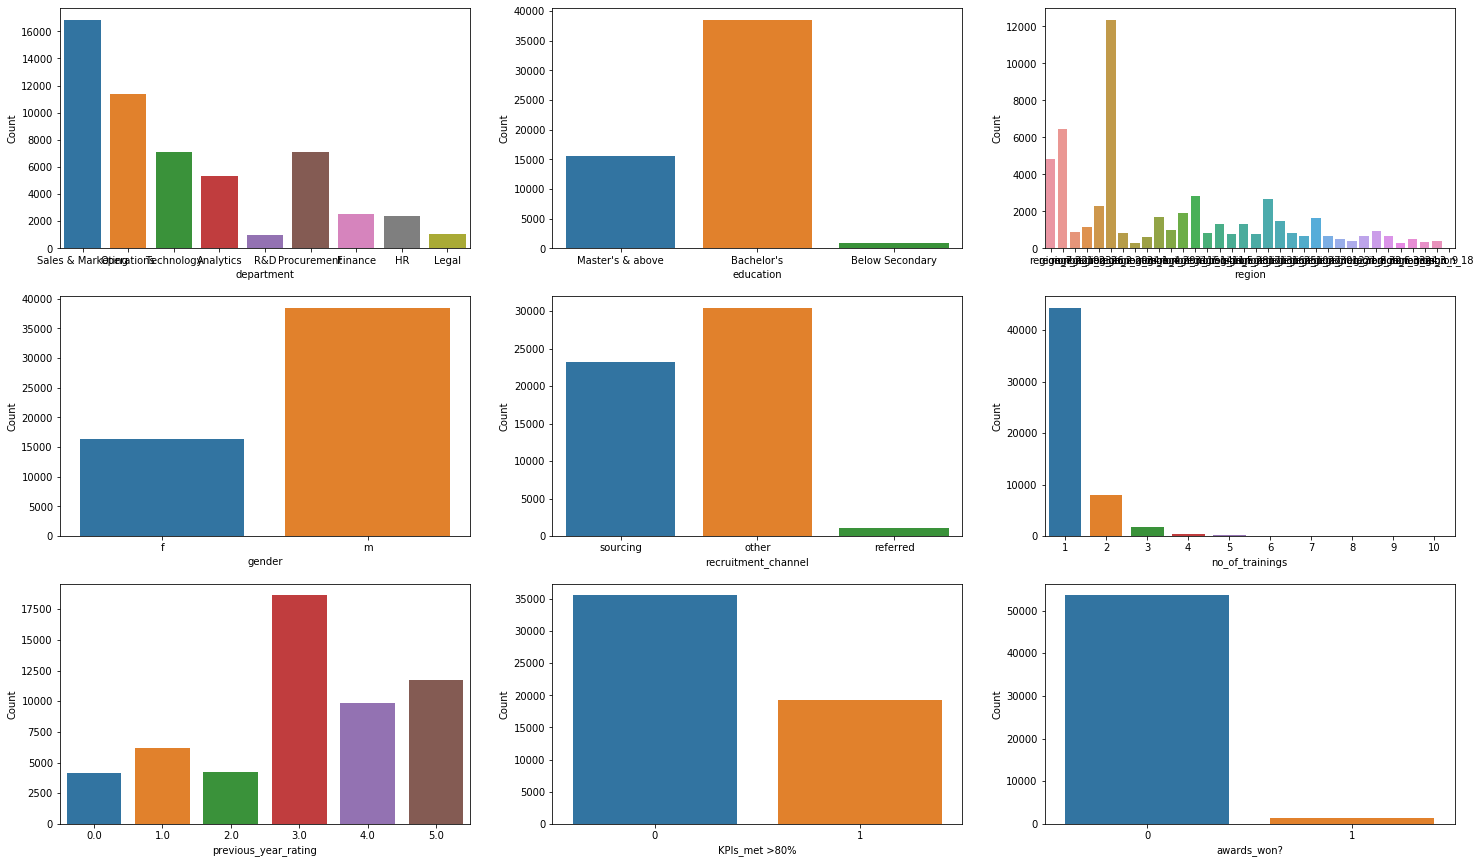

In [35]:
## plotting countplots for categorical variables
plt.figure(figsize=(25,15))
for i in range(1,len(categorical_var)+1):
    plt.subplot(3,3,i)
    sns.countplot(df_train[categorical_var[i-1]])
    plt.xlabel(categorical_var[i-1])
    plt.ylabel('Count')

### 2) Bivariate Analysis

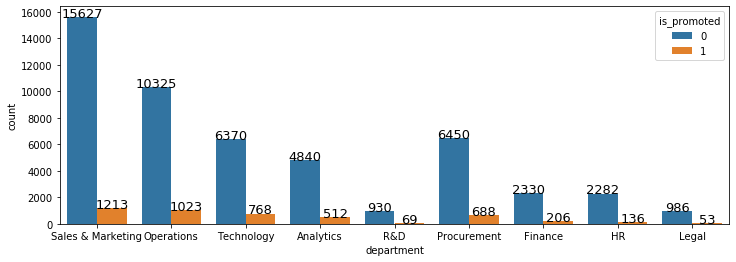

In [36]:
plt.figure(figsize=(12,4))
g = sns.countplot(x='department',hue='is_promoted',data=df_train)
for p in g.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    g.text(x+width/2, y+height, '{}'.format(height), horizontalalignment='center',fontsize=13)

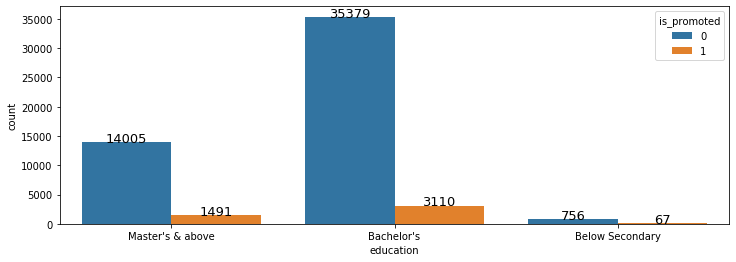

In [37]:
plt.figure(figsize=(12,4))
g = sns.countplot(x='education',hue='is_promoted',data=df_train)
for p in g.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    g.text(x+width/2, y+height, '{}'.format(height), horizontalalignment='center',fontsize=13)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

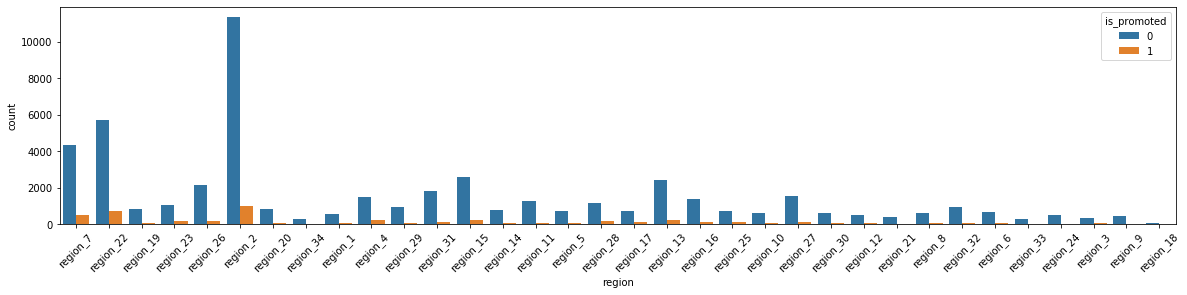

In [38]:
plt.figure(figsize=(20,4))
sns.countplot(x='region',hue='is_promoted',data=df_train)
plt.xticks(rotation=45)

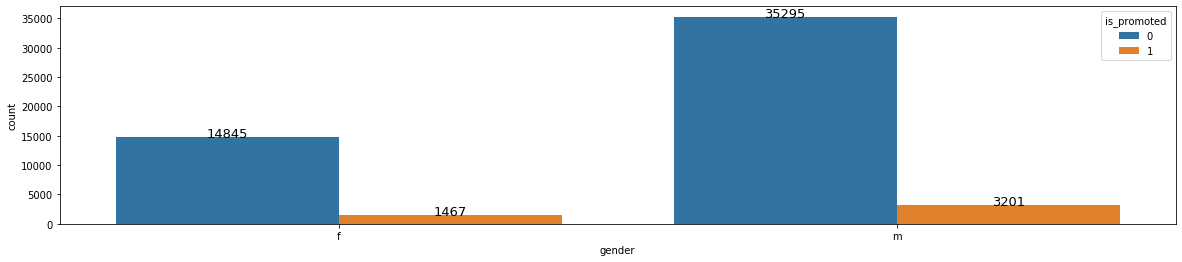

In [39]:
plt.figure(figsize=(20,4))
g = sns.countplot(x='gender',hue='is_promoted',data=df_train)
for p in g.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    g.text(x+width/2, y+height, '{}'.format(height), horizontalalignment='center',fontsize=13)

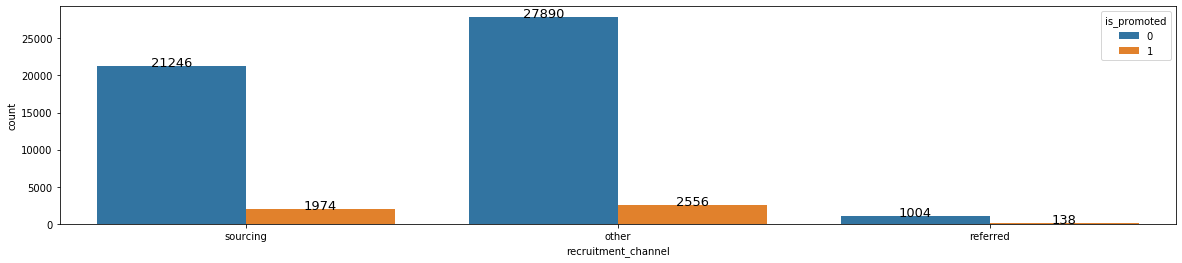

In [40]:
plt.figure(figsize=(20,4))
g = sns.countplot(x='recruitment_channel',hue='is_promoted',data=df_train)
for p in g.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    g.text(x+width/2, y+height, '{}'.format(height), horizontalalignment='center',fontsize=13)

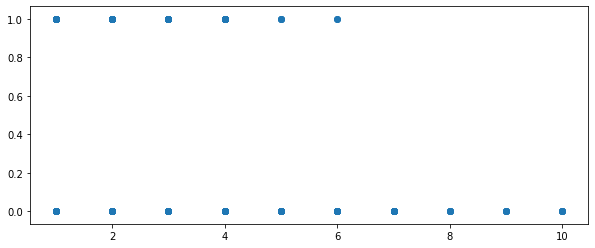

In [41]:
plt.figure(figsize=(10,4))
plt.scatter(x='no_of_trainings',y='is_promoted',data=df_train)

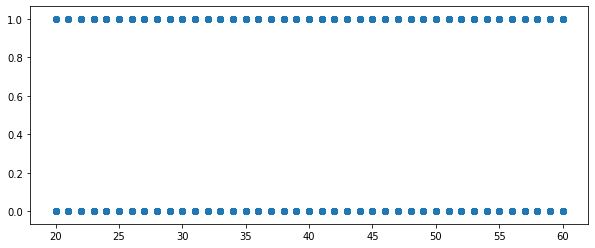

In [42]:
plt.figure(figsize=(10,4))
plt.scatter(x='age',y='is_promoted',data=df_train)

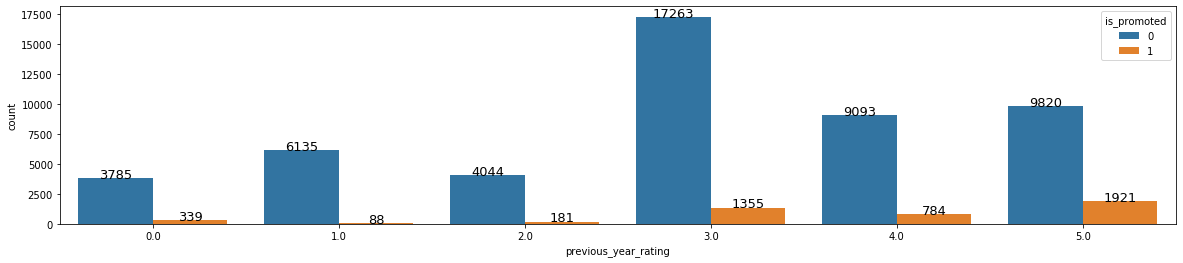

In [43]:
plt.figure(figsize=(20,4))
g = sns.countplot(x='previous_year_rating',hue='is_promoted',data=df_train)
for p in g.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    g.text(x+width/2, y+height, '{}'.format(height), horizontalalignment='center',fontsize=13)

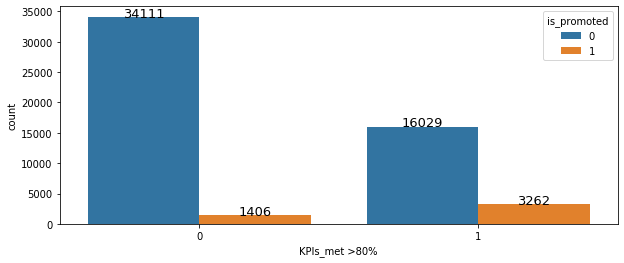

In [44]:
plt.figure(figsize=(10,4))
g = sns.countplot(x='KPIs_met >80%',hue='is_promoted',data=df_train)
for p in g.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    g.text(x+width/2, y+height, '{}'.format(height), horizontalalignment='center',fontsize=13)

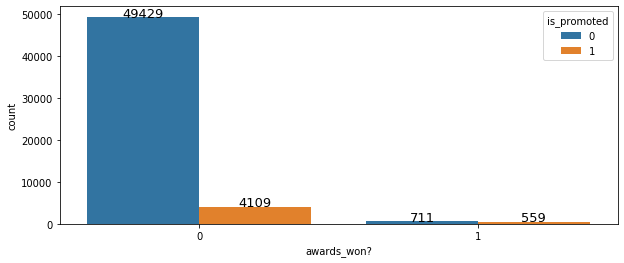

In [45]:
plt.figure(figsize=(10,4))
g = sns.countplot(x='awards_won?',hue='is_promoted',data=df_train)
for p in g.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    g.text(x+width/2, y+height, '{}'.format(height), horizontalalignment='center',fontsize=13)

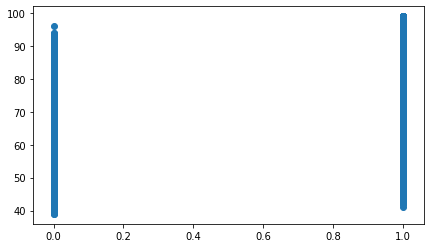

In [46]:
plt.figure(figsize=(7,4))
plt.scatter(x='is_promoted',y='avg_training_score',data=df_train)

### 3) Trivariate Analysis

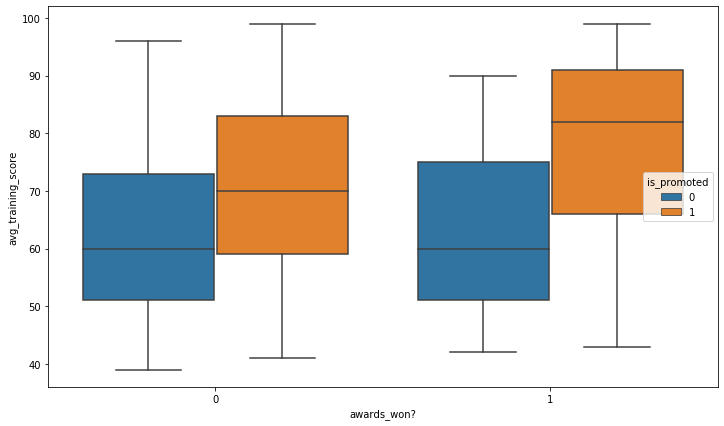

In [47]:
plt.figure(figsize=(12,7))
sns.boxplot(x='awards_won?',y='avg_training_score',hue='is_promoted',data=df_train)

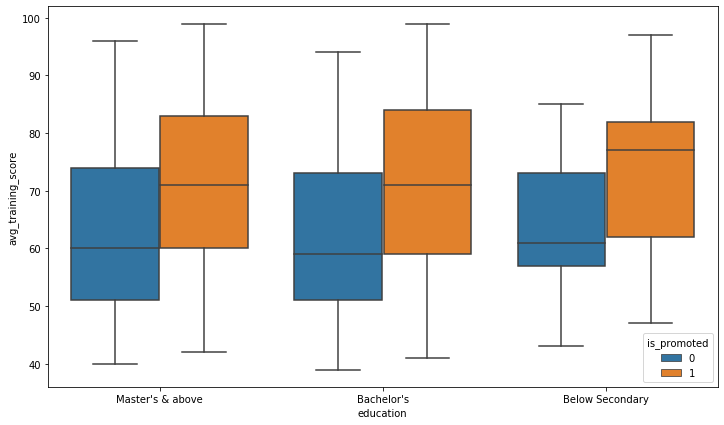

In [48]:
plt.figure(figsize=(12,7))
sns.boxplot(x='education',y='avg_training_score',hue='is_promoted',data=df_train)

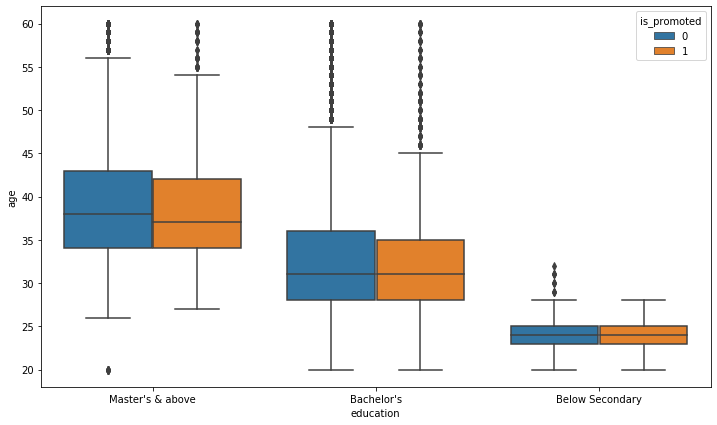

In [49]:
plt.figure(figsize=(12,7))
sns.boxplot(x='education',y='age',hue='is_promoted',data=df_train)

# Step 4 : Final Data Preparation

In [50]:
# Creating dummy variables for the categorical data
ml = pd.get_dummies(df_train['department'], prefix='department',drop_first=True)
#Adding the results to the master dataframe
df_train = pd.concat([df_train,ml], axis=1)
df_train.drop(['department'],axis=1,inplace=True)

m2 = pd.get_dummies(df_train['region'], prefix='region',drop_first=True)
#Adding the results to the master dataframe
df_train = pd.concat([df_train,m2], axis=1)
df_train.drop(['region'],axis=1,inplace=True)

m3 = pd.get_dummies(df_train['education'], prefix='education',drop_first=True)
#Adding the results to the master dataframe
df_train = pd.concat([df_train,m3], axis=1)
df_train.drop(['education'],axis=1,inplace=True)

m4 = pd.get_dummies(df_train['recruitment_channel'], prefix='recruitment_channel',drop_first=True)
#Adding the results to the master dataframe
df_train = pd.concat([df_train,m4], axis=1)
df_train.drop(['recruitment_channel'],axis=1,inplace=True)

#mapping variable 'gender' to 0 and 1 for M and F
df_train['gender'] = df_train['gender'].map({'m':0,'f':1})

In [51]:
pd.set_option('display.max_columns',None)
df_train.head()

,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,recruitment_channel_referred,recruitment_channel_sourcing
0,1,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,0,1,30,5.0,4,0,0,60,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
df_train.shape

(54808, 54)

## Step 5 : Train Test split & Feature Scaling

In [53]:
X = df_train.drop(['is_promoted'],axis=1)
y = df_train['is_promoted']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [55]:
y_train.value_counts()[1]/len(y_train.index)*100

8.455623615274337

In [56]:
X_train.shape

(38365, 53)

In [57]:
# scaler = StandardScaler()

# X_train[['']]

## Step 6 : 1st Model

In [58]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                38365
Model:                            GLM   Df Residuals:                    38311
Model Family:                Binomial   Df Model:                           53
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7561.4
Date:                Sat, 23 Jan 2021   Deviance:                       15123.
Time:                        12:32:32   Pearson chi2:                 3.08e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -29.2006      0.592    -49.300      0.000     -30.361     -28.040
gender                          -0.0172      0.050     -0.345      0.730      -0.115       0.080
no_of_trainings                 -0.1415      0.042     -3.364      0.001      -0.224      -0.059
age                             -0.0313      0.004     -7.007      0.000      -0.040      -0.023
previous_year_rating             0.1370      0.016      8.452      0.000       0.105       0.169
length_of_service                0.0222      0.007      3.056      0.002       0.008       0.036
KPIs_met >80%                    1.9470      0.053     37.061      0.000       1.844       2.050
awards_won?                      1.4993      0.095     15.802      0.000       1.313       1.685
avg_training_score               0.3065      0.006     49.791      0.000       0.294       0.319
department_Finance               7.0213      0.194     36.229      0.000       6.641       7.401
department_HR                   10.0599      0.253     39.809      0.000       9.565      10.555
department_Legal                 6.8655      0.254     27.011      0.000       6.367       7.364
department_Operations            7.2757      0.170     42.876      0.000       6.943       7.608
department_Procurement           4.4421      0.126     35.193      0.000       4.195       4.689
department_R&D                  -0.4741      0.172     -2.762      0.006      -0.810      -0.138
department_Sales & Marketing    10.4280      0.226     46.203      0.000       9.986      10.870
department_Technology            1.7440      0.091     19.184      0.000       1.566       1.922
region_region_10                 0.2127      0.273      0.779      0.436      -0.323       0.748
region_region_11                -0.4087      0.256     -1.596      0.110      -0.910       0.093
region_region_12                -0.4632      0.335     -1.382      0.167      -1.120       0.194
region_region_13                -0.0328      0.218     -0.150      0.881      -0.460       0.395
region_region_14                -0.2259      0.275     -0.822      0.411      -0.765       0.313
region_region_15                 0.0270      0.217      0.124      0.901      -0.399       0.453
region_region_16                -0.0573      0.240     -0.239      0.811      -0.527       0.412
region_region_17                 0.2586      0.253      1.022      0.307      -0.237       0.754
region_region_18                 0.6288      1.082      0.581      0.561      -1.492       2.750
region_region_19                 0.1241      0.265      0.468      0.640      -0.395       0.643
region_region_2                  0.0905      0.201      0.450      0.652      -0.303       0.484
region_region_20                -0.4697      0.289     -1.626      0.104    

In [59]:
logm2 = LogisticRegression(class_weight='balanced')
logm2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
y_pred = logm2.predict(X_test)

In [61]:
metrics.accuracy_score(y_pred,y_test)

0.7304019947698108

In [62]:
f1_test = metrics.f1_score(y_test, y_pred)
f1_test

0.32248204187681495

In [63]:
metrics.confusion_matrix(y_pred,y_test)

array([[10955,   369],
       [ 4064,  1055]], dtype=int64)

In [64]:
# Function to create a confusion matrix 
def conf_matrix(y_test, y_pred):    
    
    # Creating a confusion matrix
    con_mat = metrics.confusion_matrix(y_test, y_pred)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

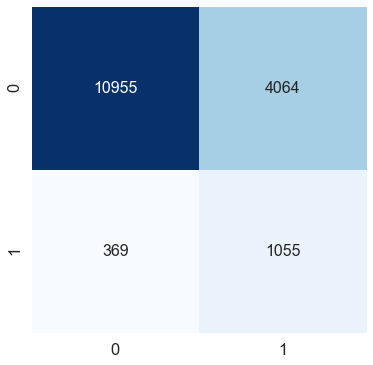

In [65]:
conf_matrix(y_test,y_pred)

In [66]:
metrics.roc_auc_score(y_pred,y_test)

0.5867546408201166

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.1min finished


Text(0.5, 1.0, 'Scoring for different class weights')

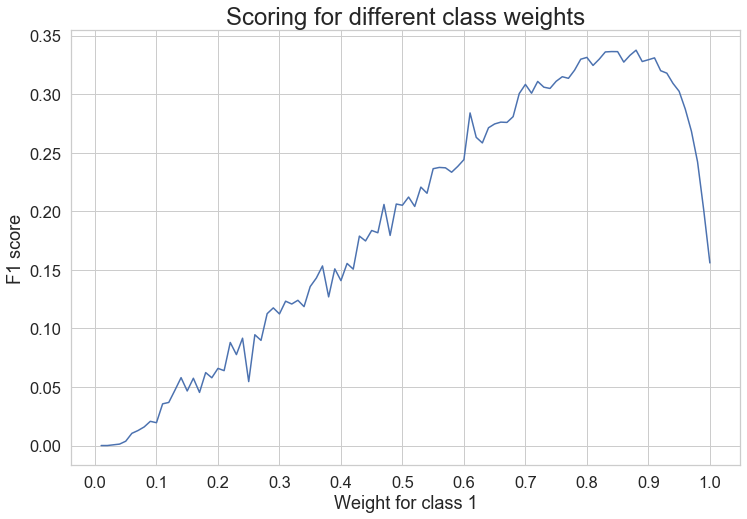

In [67]:
lr = LogisticRegression()

#Setting the range for class weights
weights = np.linspace(0.0,0.99,100)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train, y_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [68]:
logm3 = LogisticRegression(class_weight={0:0.08,1:0.92})
logm3.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight={0: 0.08, 1: 0.92}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
y_pred = logm3.predict(X_test)

In [70]:
f1_test = metrics.f1_score(y_test, y_pred)
f1_test

0.32605092662347446

In [71]:
metrics.accuracy_score(y_pred,y_test)

0.7279693486590039

In [72]:
metrics.confusion_matrix(y_pred,y_test)

array([[10888,   342],
       [ 4131,  1082]], dtype=int64)

### Tweaking the threshold value

In [73]:
# Logistic regression model
logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
model4 = logm4.fit()
model4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                38365
Model:                            GLM   Df Residuals:                    38311
Model Family:                Binomial   Df Model:                           53
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7561.4
Date:                Sat, 23 Jan 2021   Deviance:                       15123.
Time:                        12:36:46   Pearson chi2:                 3.08e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -29.2006      0.592    -49.300      0.000     -30.361     -28.040
gender                          -0.0172      0.050     -0.345      0.730      -0.115       0.080
no_of_trainings                 -0.1415      0.042     -3.364      0.001      -0.224      -0.059
age                             -0.0313      0.004     -7.007      0.000      -0.040      -0.023
previous_year_rating             0.1370      0.016      8.452      0.000       0.105       0.169
length_of_service                0.0222      0.007      3.056      0.002       0.008       0.036
KPIs_met >80%                    1.9470      0.053     37.061      0.000       1.844       2.050
awards_won?                      1.4993      0.095     15.802      0.000       1.313       1.685
avg_training_score               0.3065      0.006     49.791      0.000       0.294       0.319
department_Finance               7.0213      0.194     36.229      0.000       6.641       7.401
department_HR                   10.0599      0.253     39.809      0.000       9.565      10.555
department_Legal                 6.8655      0.254     27.011      0.000       6.367       7.364
department_Operations            7.2757      0.170     42.876      0.000       6.943       7.608
department_Procurement           4.4421      0.126     35.193      0.000       4.195       4.689
department_R&D                  -0.4741      0.172     -2.762      0.006      -0.810      -0.138
department_Sales & Marketing    10.4280      0.226     46.203      0.000       9.986      10.870
department_Technology            1.7440      0.091     19.184      0.000       1.566       1.922
region_region_10                 0.2127      0.273      0.779      0.436      -0.323       0.748
region_region_11                -0.4087      0.256     -1.596      0.110      -0.910       0.093
region_region_12                -0.4632      0.335     -1.382      0.167      -1.120       0.194
region_region_13                -0.0328      0.218     -0.150      0.881      -0.460       0.395
region_region_14                -0.2259      0.275     -0.822      0.411      -0.765       0.313
region_region_15                 0.0270      0.217      0.124      0.901      -0.399       0.453
region_region_16                -0.0573      0.240     -0.239      0.811      -0.527       0.412
region_region_17                 0.2586      0.253      1.022      0.307      -0.237       0.754
region_region_18                 0.6288      1.082      0.581      0.561      -1.492       2.750
region_region_19                 0.1241      0.265      0.468      0.640      -0.395       0.643
region_region_2                  0.0905      0.201      0.450      0.652      -0.303       0.484
region_region_20                -0.4697      0.289     -1.626      0.104    

In [74]:
# Getting the predicted values on the train set
X_train_sm  = sm.add_constant(X_train)
y_train_pred = model4.predict(X_train_sm)
y_train_pred[:10]

41184    0.024485
13041    0.012630
40396    0.005435
42434    0.024761
54002    0.015421
43097    0.015065
27915    0.057323
857      0.335081
21329    0.146670
16088    0.046165
dtype: float64

In [75]:
y_train_pred_final = pd.DataFrame({'Promotion':y_train.values, 'Promotion_Prob':y_train_pred})
y_train_pred_final['EmployeeID'] = y_train.index
y_train_pred_final.head()

,Promotion,Promotion_Prob,EmployeeID
41184,0,0.024485,41184
13041,0,0.012630,13041
40396,0,0.005435,40396
42434,0,0.024761,42434
54002,0,0.015421,54002


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.27 else 0

In [76]:
y_train_pred_final['predicted'] = y_train_pred_final.Promotion_Prob.map(lambda x: 1 if x > 0.27 else 0)

# Let's see the head
y_train_pred_final.head()

,Promotion,Promotion_Prob,EmployeeID,predicted
41184,0,0.024485,41184,0
13041,0,0.012630,13041,0
40396,0,0.005435,40396,0
42434,0,0.024761,42434,0
54002,0,0.015421,54002,0


In [77]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Promotion, y_train_pred_final.predicted )
print(confusion)

[[33664  1457]
 [ 1849  1395]]


In [78]:
metrics.accuracy_score(y_train_pred_final.predicted,y_train_pred_final.Promotion)

0.9138277075459403

In [79]:
f1_test = metrics.f1_score(y_train_pred_final.predicted,y_train_pred_final.Promotion)
f1_test

0.4576771653543307

## Step 6 : 2nd Model

In [81]:
X_train.head()

,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,recruitment_channel_referred,recruitment_channel_sourcing
41184,1,1,26,3.0,2,0,0,59,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
13041,0,1,40,3.0,8,0,0,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
40396,1,1,39,5.0,11,0,0,43,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
42434,0,2,35,5.0,10,0,0,61,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
54002,0,1,31,3.0,4,0,0,62,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [82]:
y_train.reset_index(drop=True,inplace=True)

In [87]:
#Setting the range for class weights
# weights = np.linspace(0.0,0.99,10)


# list of alphas to tune
params = {'C': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
                20, 50, 100, 500, 1000]}

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

log_regul = LogisticRegression(penalty='l2', class_weight={0:0.08, 1:0.92})

# cross validation
model5 = GridSearchCV(estimator = log_regul, 
                        param_grid = params, 
                        scoring= 'f1', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model5.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:  1.7min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0,
                                          class_weight={0: 0.08, 1: 0.92},
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                               0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8,
                               9, 10, 20, 50, 100, 500, 1000]},
             

In [88]:
model5.best_params_

{'C': 10}

In [89]:
model5.best_score_

0.324356766642686

In [91]:
cv1_results = pd.DataFrame(model5.cv_results_)
cv1_results.head(50)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.550860,0.146508,0.010594,1.958204e-03,0.0001,{'C': 0.0001},0.225328,0.209454,0.224789,0.235619,0.221065,0.223251,0.008424,28,0.223296,0.226771,0.223329,0.220436,0.224107,0.223588,0.002024
1,0.677784,0.057466,0.009393,3.717392e-03,0.001,{'C': 0.001},0.255026,0.244131,0.254817,0.258645,0.252718,0.253068,0.004858,27,0.253278,0.256012,0.253539,0.251966,0.255454,0.254050,0.001484
2,0.740744,0.106618,0.006995,1.181556e-06,0.01,{'C': 0.01},0.322347,0.307594,0.303721,0.295754,0.303655,0.306614,0.008758,26,0.306594,0.317473,0.304737,0.305367,0.307494,0.308333,0.004669
3,0.722755,0.090972,0.008394,1.743067e-03,0.05,{'C': 0.05},0.332197,0.306760,0.310786,0.312672,0.322917,0.317066,0.009253,25,0.318838,0.321295,0.318355,0.318096,0.322596,0.319836,0.001787
4,0.717558,0.022115,0.008794,2.711537e-03,0.1,{'C': 0.1},0.326544,0.311428,0.316279,0.315789,0.321795,0.318367,0.005249,23,0.315647,0.323309,0.324282,0.321307,0.318451,0.320599,0.003180
5,0.703366,0.035886,0.007596,1.356987e-03,0.2,{'C': 0.2},0.330850,0.307841,0.314856,0.315593,0.319511,0.317730,0.007562,24,0.316875,0.321589,0.325282,0.323250,0.320207,0.321441,0.002843
6,0.724356,0.105180,0.008193,1.598634e-03,0.3,{'C': 0.3},0.335022,0.304720,0.319249,0.314746,0.319620,0.318671,0.009784,22,0.320835,0.318960,0.321589,0.324389,0.314525,0.320059,0.003272
7,0.710362,0.060789,0.009594,2.058690e-03,0.4,{'C': 0.4},0.333650,0.309656,0.315789,0.316020,0.324992,0.320022,0.008388,18,0.320006,0.326456,0.325939,0.324962,0.323878,0.324248,0.002297
8,0.691773,0.027416,0.008194,1.599598e-03,0.5,{'C': 0.5},0.338189,0.308885,0.318109,0.321608,0.325673,0.322493,0.009609,8,0.320605,0.323731,0.323362,0.327850,0.322555,0.323620,0.002375
9,0.729751,0.095919,0.007795,1.599217e-03,0.6,{'C': 0.6},0.334292,0.314077,0.319747,0.316542,0.326260,0.322184,0.007304,9,0.321678,0.325993,0.325351,0.327124,0.330601,0.326150,0.002878


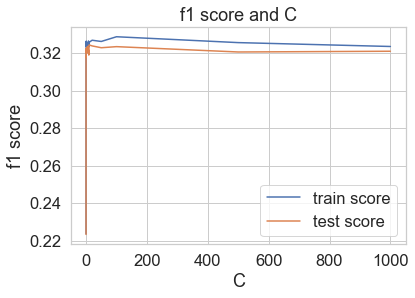

In [92]:
# plotting mean test and train scoes with alpha 
cv1_results['param_alpha'] = cv1_results['param_C'].astype('float32')

# plotting
plt.plot(cv1_results['param_C'], cv1_results['mean_train_score'])
plt.plot(cv1_results['param_C'], cv1_results['mean_test_score'])
plt.xlabel('C')
plt.ylabel('f1 score')

plt.title("f1 score and C")
plt.legend(['train score', 'test score'], loc='bottom right')
plt.show()

## Loading and updating the test file and predicting the values

## Step 7 : 3rd Model

In [94]:
# Running the random forest with default parameters.
rfc1 = RandomForestClassifier()

In [95]:
# fit
rfc1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [97]:
# Making predictions
predictions = rfc1.predict(X_test)

In [99]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     15019
           1       0.86      0.30      0.45      1424

    accuracy                           0.94     16443
   macro avg       0.90      0.65      0.71     16443
weighted avg       0.93      0.94      0.92     16443



In [100]:
print(accuracy_score(y_test,predictions))

0.9352307972997628


In [101]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[14950    69]
 [  996   428]]


In [102]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf2 = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf2, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [103]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  8.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [104]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9221947514146481 using {'max_depth': 8, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [105]:
rfc3 = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [106]:
# fit
rfc3.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [108]:
# predict
predictions = rfc3.predict(X_test)

In [109]:
f1_test = metrics.f1_score(predictions,y_test)
f1_test

0.2031152647975078

In [110]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15019
           1       0.90      0.11      0.20      1424

    accuracy                           0.92     16443
   macro avg       0.91      0.56      0.58     16443
weighted avg       0.92      0.92      0.89     16443



In [124]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(20, 60, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="f1",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [125]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.683085,0.244604,0.210094,0.056033,20,{'max_depth': 20},0.288288,0.336283,0.401949,0.379778,0.380717,0.357403,0.040624,8,0.605426,0.598812,0.612299,0.614522,0.585446,0.603301,0.010492
1,4.118858,0.144688,0.189628,0.004269,25,{'max_depth': 25},0.348148,0.351051,0.431925,0.409146,0.422803,0.392614,0.035874,7,0.813257,0.795544,0.827913,0.823396,0.812629,0.814548,0.011166
2,4.127075,0.159748,0.231852,0.044974,30,{'max_depth': 30},0.352078,0.382567,0.426230,0.416471,0.439535,0.403376,0.031830,5,0.942997,0.927464,0.945573,0.939084,0.949180,0.940860,0.007465
3,4.222952,0.134017,0.200745,0.003143,35,{'max_depth': 35},0.362981,0.371084,0.433180,0.414832,0.414035,0.399222,0.027281,6,0.989883,0.989486,0.988501,0.988698,0.990469,0.989408,0.000733
4,4.420888,0.142297,0.221628,0.023414,40,{'max_depth': 40},0.363196,0.376048,0.429733,0.419467,0.442922,0.406273,0.031102,3,0.997878,0.998650,0.998649,0.999422,0.999036,0.998727,0.000512


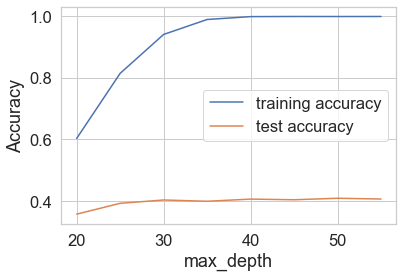

In [126]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training f1 score")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test f1 score")
plt.xlabel("max_depth")
plt.ylabel("f1 Score")
plt.legend()
plt.show()

In [127]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="f1")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training f1 score")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test f1 score")
plt.xlabel("n_estimators")
plt.ylabel("f1 score")
plt.legend()
plt.show()

In [ ]:
def annotate_graph(ax):
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{}'.format(y), (x.mean(), y), 
                ha='center', va='bottom')

In [ ]:
def promotion_rate(var,annotate=True,x_rotation=False, size=(10,10)):
    plt.figure(figsize=size)
    ax=sns.barplot(x=var, y='is_promoted',data=df,ci=None)
    plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
    annotate_graph_pct(ax)
    plt.title("promotion rate for {0}".format(var))
    if x_rotation:
        plt.xticks(rotation=45)
    plt.show()